In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [102]:
dataset = pd.read_csv('petrol_consumption.csv')

# Descriptive Analysis of the data

In [103]:
dataset.shape

(48, 5)

In [69]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [70]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [71]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


#### Petrol_tax and Population_Driver_license are highly correlated with our target variable.

# Exploratory Data Analysis 

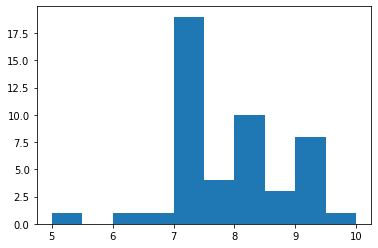

In [72]:
plt.hist(dataset.Petrol_tax)
plt.show()

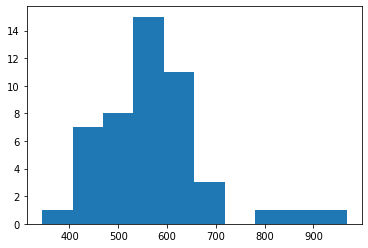

In [46]:
plt.hist(dataset.Petrol_Consumption)
plt.show()

#### Petrol is largely consumed in between 500 - 600 gallons

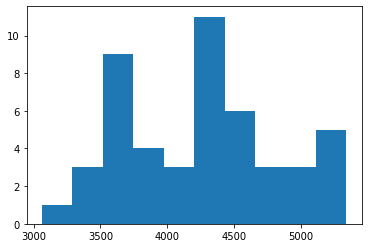

In [21]:
plt.hist(dataset.Average_income)
plt.show()

#### Average incomes of many people is between 3500 - 4000 and 4000 - 4500

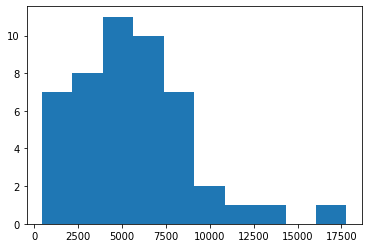

In [22]:
plt.hist(dataset.Paved_Highways)
plt.show()

#### Many people covered a distance of 5000 miles. Nobody covered 15000 miles and there is an outlier of some people covering 17500 miles

In [23]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [37]:
dataset['Population_Driver_licence(%)'].value_counts()

0.571    2
0.663    2
0.672    2
0.586    2
0.544    2
0.572    2
0.563    2
0.525    2
0.529    2
0.566    1
0.626    1
0.530    1
0.548    1
0.603    1
0.553    1
0.578    1
0.629    1
0.574    1
0.551    1
0.545    1
0.517    1
0.547    1
0.580    1
0.608    1
0.540    1
0.451    1
0.724    1
0.593    1
0.487    1
0.508    1
0.513    1
0.579    1
0.623    1
0.602    1
0.511    1
0.677    1
0.552    1
0.493    1
0.518    1
Name: Population_Driver_licence(%), dtype: int64

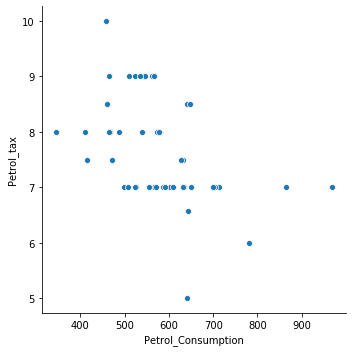

In [42]:
sns.relplot(x = 'Petrol_Consumption', y = 'Petrol_tax', data = dataset)

#### When petrol tax is high, consumption of petrol is less. There is Negative Correlation

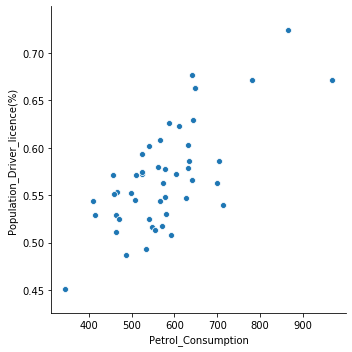

In [44]:
sns.relplot(x = 'Petrol_Consumption', y = 'Population_Driver_licence(%)', data = dataset)

#### There is a Positive correlation, since petrol consumption is increasing with a increase in driver licence

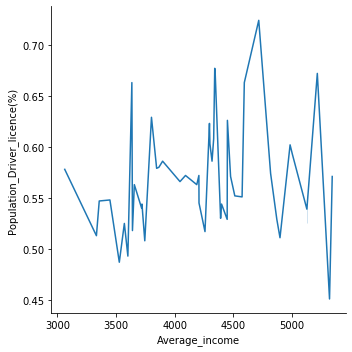

In [50]:
sns.relplot(x = 'Average_income', y = 'Population_Driver_licence(%)', data = dataset, kind = 'line')

#### Between 4500 to 5000 many people took drivers licence. In other words when average income of population rose many took drivers licence.  

# Preparing the Data

In [104]:
# Extracting X and y:

X = dataset.iloc[:,:-1]
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [105]:
y = dataset.iloc[:,-1]
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [106]:
# Train and test split:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 4), (10, 4), (38,), (10,))

# Standardization

In [108]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

print(X_train_std)
print(X_test_std)

[[-1.32525691e-01  1.50577399e+00  2.25854636e+00 -9.15791057e-01]
 [-6.28192647e-01 -1.83367022e+00  2.12333843e-01 -1.12852703e+00]
 [-1.32525691e-01 -1.78897047e+00 -4.54194551e-01 -5.25775100e-01]
 [-1.32525691e-01 -8.78212954e-01  8.77245103e-01  4.15208375e-02]
 [-6.28192647e-01  1.27482526e+00  1.07480487e+00  2.89712810e-01]
 [ 1.35447518e+00 -8.42825648e-01 -1.13743332e+00  5.92488356e-02]
 [-6.28192647e-01 -4.00925436e-02 -4.64436395e-01  8.21552752e-01]
 [-6.28192647e-01  7.42153173e-01  2.93282707e-02  2.61208055e+00]
 [-6.28192647e-01  8.82232011e-04  1.22196399e+00  1.65616824e-01]
 [ 3.63141265e-01 -2.41241442e-01  4.54996025e-02 -2.42127131e-01]
 [ 1.35447518e+00  1.07926383e+00 -9.04835665e-01 -1.16398303e+00]
 [-6.28192647e-01 -2.07716626e-01  7.28199328e-01 -8.25751488e-02]
 [-6.28192647e-01 -1.23208602e+00 -4.90849570e-01 -2.42127131e-01]
 [-6.28192647e-01  5.13066928e-01  5.46541367e-01  1.53067267e+00]
 [-6.28192647e-01 -3.26425844e-02 -5.85182339e-01  4.66992791e

In [109]:
# Reshaping y data for Standardization and Normalisation

y_train = np.array(y_train)
y_train1 = np.reshape(y_train, (-1,1))

y_test = np.array(y_test)
y_test1 = np.reshape(y_test, (-1,1))

In [110]:
std = StandardScaler()
y_train_std = std.fit_transform(y_train1)
y_test_std = std.transform(y_test1)

print(y_train_std)
print(y_test_std)

[[-0.96546922]
 [-0.25615407]
 [ 0.37624738]
 [ 0.40188528]
 [-0.51253304]
 [-0.19633231]
 [ 0.22242   ]
 [ 2.40164123]
 [ 0.43606914]
 [-0.08523476]
 [-1.02529098]
 [ 0.16259824]
 [ 0.98301094]
 [ 0.55571266]
 [ 0.41043124]
 [-1.02529098]
 [-0.64926849]
 [-0.15360249]
 [-1.08511274]
 [ 1.11120042]
 [ 0.51298283]
 [-0.15360249]
 [ 0.54716669]
 [-0.51253304]
 [-0.50398708]
 [ 0.06004665]
 [-1.05947484]
 [-2.05080685]
 [-0.31597583]
 [ 0.47879897]
 [-0.37579759]
 [ 0.47879897]
 [-0.73472815]
 [ 3.28187568]
 [-0.63217656]
 [-1.45258926]
 [-0.36725163]
 [ 1.69232608]]
[[-0.42707339]
 [-1.48677312]
 [-0.05959687]
 [-0.11087266]
 [-0.05959687]
 [ 1.02574077]
 [-0.82873377]
 [ 0.02586279]
 [-0.99965308]
 [-0.03395897]]


# Normalization

In [134]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

print(X_train_std)
print(X_test_std)

[[-1.32525691e-01  1.50577399e+00  2.25854636e+00 -9.15791057e-01]
 [-6.28192647e-01 -1.83367022e+00  2.12333843e-01 -1.12852703e+00]
 [-1.32525691e-01 -1.78897047e+00 -4.54194551e-01 -5.25775100e-01]
 [-1.32525691e-01 -8.78212954e-01  8.77245103e-01  4.15208375e-02]
 [-6.28192647e-01  1.27482526e+00  1.07480487e+00  2.89712810e-01]
 [ 1.35447518e+00 -8.42825648e-01 -1.13743332e+00  5.92488356e-02]
 [-6.28192647e-01 -4.00925436e-02 -4.64436395e-01  8.21552752e-01]
 [-6.28192647e-01  7.42153173e-01  2.93282707e-02  2.61208055e+00]
 [-6.28192647e-01  8.82232011e-04  1.22196399e+00  1.65616824e-01]
 [ 3.63141265e-01 -2.41241442e-01  4.54996025e-02 -2.42127131e-01]
 [ 1.35447518e+00  1.07926383e+00 -9.04835665e-01 -1.16398303e+00]
 [-6.28192647e-01 -2.07716626e-01  7.28199328e-01 -8.25751488e-02]
 [-6.28192647e-01 -1.23208602e+00 -4.90849570e-01 -2.42127131e-01]
 [-6.28192647e-01  5.13066928e-01  5.46541367e-01  1.53067267e+00]
 [-6.28192647e-01 -3.26425844e-02 -5.85182339e-01  4.66992791e

In [135]:
mms = MinMaxScaler()
y_train_mms = mms.fit_transform(y_train1)
y_test_mms = mms.transform(y_test1)

print(y_train_mms)
print(y_test_mms)

[[0.20352564]
 [0.33653846]
 [0.45512821]
 [0.4599359 ]
 [0.28846154]
 [0.34775641]
 [0.42628205]
 [0.8349359 ]
 [0.46634615]
 [0.36858974]
 [0.19230769]
 [0.4150641 ]
 [0.56891026]
 [0.48878205]
 [0.46153846]
 [0.19230769]
 [0.26282051]
 [0.35576923]
 [0.18108974]
 [0.59294872]
 [0.48076923]
 [0.35576923]
 [0.48717949]
 [0.28846154]
 [0.2900641 ]
 [0.39583333]
 [0.18589744]
 [0.        ]
 [0.32532051]
 [0.47435897]
 [0.31410256]
 [0.47435897]
 [0.24679487]
 [1.        ]
 [0.26602564]
 [0.11217949]
 [0.31570513]
 [0.70192308]]
[[0.30448718]
 [0.10576923]
 [0.37339744]
 [0.36378205]
 [0.37339744]
 [0.57692308]
 [0.22916667]
 [0.38942308]
 [0.19711538]
 [0.37820513]]


# Training the Algorithm

## 1. Using Standardised data:

In [111]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
regressor.coef_

array([[-0.34497055, -0.30014361, -0.15031841,  0.64685857]])

In [117]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

ValueError: Shape of passed values is (1, 4), indices imply (4, 1)

In [90]:
regressor.intercept_

array([5.55138501e-16])

In [123]:
regressor.score(X_train_std, y_train_std)

0.7208154295817701

# Making Predictions

In [118]:
y_pred_std = regressor.predict(X_test_std)
y_pred_std

array([[-0.97921123],
       [-0.32755165],
       [ 0.04866679],
       [-0.1217225 ],
       [ 0.56233415],
       [ 0.53546866],
       [-0.61843338],
       [ 0.75633071],
       [-0.6999052 ],
       [-0.70677657]])

In [122]:
df = pd.DataFrame({'Actual': y_test_std, 'Predicted': y_pred_std})
df

ValueError: If using all scalar values, you must pass an index

# Evaluating the Algorithm

In [133]:
from sklearn import metrics

print("Mean Absolute Error :", metrics.mean_absolute_error(y_test_std, y_pred_std))
print("Mean Squared Error :", metrics.mean_squared_error(y_test_std, y_pred_std))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test_std, y_pred_std)))

Mean Absolute Error : 0.4856009721603545
Mean Squared Error : 0.34079962271797926
Root Mean Squared Error : 0.5837804576362412


##### You can see that the value of root mean squared error is 58.37, which is slightly greater than 10% of the mean value of the petrol consumption . This means that our algorithm is not very accurate.

## 2. Using Normalised Data

In [137]:
regressor1 = LinearRegression()
regressor1.fit(X_train_mms, y_train_mms)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
regressor1.coef_, regressor1.intercept_

(array([[-0.32064632, -0.21059944, -0.13052213,  0.58706468]]),
 array([0.425996]))

In [140]:
regressor1.score(X_train_mms, y_train_mms)

0.7208154295817701

In [139]:
y_pred_mms = regressor.predict(X_test_mms)

In [141]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_mms, y_pred_mms))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_mms, y_pred_mms))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test_mms, y_pred_mms)))

Mean Absolute Error: 0.4247718278208585
Mean Squared Error: 0.19262005378804206
Root Mean Squared Error: 0.43888501203395186


##### You can see that the value of root mean squared error is 43.88, which is lesser than 10% of the mean value of the petrol consumption (i.e. 57.6). This means that our algorithm was accurate.

### # Normalised data shows that our algorithm is accurate and Standardised data shows that our algorithm is not very accurate.